In [222]:
import sklearn,math, itertools
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
import time

In [223]:
data = pd.read_csv("evaluations.csv")

# total = len(data)
# print(len(data))
# clean_data = data[data["move number"] / data["total moves"]  > 0.25]
# print(len(clean_data)/total)
# clean_data = clean_data[clean_data["move number"] / clean_data["total moves"] < 0.75]
# print(len(clean_data)/total)
# clean_data = clean_data[clean_data["total moves"] < 200]
# print(len(clean_data)/total)
# clean_data = clean_data[clean_data["total moves"] > 20]
# print(len(clean_data)/total)

# data = clean_data






####
data_winning = data[data["winner"]=="White"]
data_not_winning = data[data["winner"]!="White"]
# print(len(data_winning))
# print(len(data_not_winning))





# data_winning = data[data["winner"]=="White"]
# data_losing = data[data["winner"]=="Black"]
# data_draw = data[data["winner"]=="Draw"]
data_winning = data_winning.sample(20000)
data_not_winning = data_not_winning.sample(20000)
# data_winning = data_winning.sample(2000)
# data_losing = data_losing.sample(2000)
# data_draw = data_draw.sample(500)
data = data_winning.append(data_not_winning)
data = data.reset_index(drop=True)

In [224]:
data


,fen,winner,move number,total moves,W_material sum,W_pawn control,W_piece squares sum,W_diagonal control,W_center control,W_doubled pawns,...,B_piece squares sum,B_diagonal control,B_center control,B_doubled pawns,B_mobility,B_both bishops,B_not all pawns,B_pinned evaluation,B_attacker evalutation,B_has queen
0,4r1k1/p1pb1p1p/6p1/1p1q4/5P1Q/1PBB4/PKP5/R7 b ...,White,36,63,24,2,2522,1,3,0,...,-2367,-1,-5,0,-47,0,-1,0,-4,-1
1,8/5p1p/R7/p5pk/b7/4P3/5PPP/6K1 b - - 1 35,White,36,75,9,2,867,0,1,0,...,-623,0,0,0,-13,0,-1,0,0,0
2,r1b2rk1/p1q2p1p/1pp3pb/2p1p2n/4P3/2NP1N1P/PPPQ...,White,35,51,33,2,3362,0,6,1,...,-3717,0,-5,0,-38,-1,0,0,-10,-1
3,4br1k/1R2bpp1/R2p1q2/4p2p/4P2P/6P1/3Q1P2/5BK1 ...,White,43,79,26,1,2762,0,4,0,...,-2703,-1,-4,0,-51,-1,-1,0,-2,-1
4,3r1rk1/4bppp/1p2p3/p2b4/6n1/1P4PP/PBRNPPB1/3R2...,White,93,175,25,2,2570,2,4,0,...,-2624,-1,-5,0,-38,-1,-1,0,-5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,b1r3k1/p2q2p1/1p2pp1p/3n4/1P1B1P2/P2P2P1/1Q4BP...,Draw,86,90,26,2,2794,3,6,0,...,-2696,-1,-4,0,-42,0,-1,0,-2,-1
39996,r1bqk2r/pppp1ppp/2N2n2/8/1b2P3/2N5/PPP2PPP/R1B...,Draw,10,91,38,2,3954,0,6,0,...,-3562,0,-2,0,-30,-1,-1,-3,-7,-1
39997,8/8/8/8/8/K1k2b1p/P2p2nP/1R6 b - - 1 91,Black,16,184,7,2,557,0,0,0,...,-1000,-1,-3,0,-21,0,-1,0,0,0
39998,4k3/5pp1/p1P1p3/Pp1bP2p/5P2/4B3/3r4/4K3 w - - ...,Black,54,72,7,2,756,0,4,0,...,-1442,-1,-5,0,-11,0,-1,0,-1,0


In [225]:
feature_cols = data.columns[4:]

target = data["winner"] == "White"

features = data[feature_cols]

scaler = MinMaxScaler()


features_transformed = scaler.fit_transform(features)
features = pd.DataFrame(features_transformed, columns=features.columns)

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25)

In [167]:
# fig, axs = plt.subplots(36, 1, figsize=(20, 360))

# for i in range(len(plot_cols)):
#     sns.distplot(features[plot_cols[i]], ax=axs.flat[i])
# #     sns.distplot(features[plot_cols[i]])

In [200]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
# X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
# estimator = DecisionTreeClassifier(max_depth=5)
estimator = LogisticRegression(solver='saga', tol=1e-2, max_iter=200)
selector = RFE(estimator, n_features_to_select=20, step=1)
selector = selector.fit(x_train, y_train)
selector.support_
print(selector.ranking_)
new_features = []
support = selector.support_
for i in range(len(features.columns)):
    if support[i]:
        new_features.append(features.columns[i])
print(new_features)

features_transformed = features[new_features]
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)

[ 1  5  1  7  1 11  1  6 14  1  1  1  1 16  1  3  1  1 17  1 15  1  1  1
  9  1  1 13  2  4  1  8 10  1 12  1]
['W_material sum', 'W_piece squares sum', 'W_center control', 'W_mobility', 'W_pinned evaluation', 'W_attacker evalutation', 'W_has queen', 'DIFF_material sum', 'DIFF_piece squares sum', 'DIFF_center control', 'DIFF_doubled pawns', 'DIFF_both bishops', 'DIFF_pinned evaluation', 'DIFF_attacker evalutation', 'DIFF_has queen', 'B_pawn control', 'B_piece squares sum', 'B_mobility', 'B_pinned evaluation', 'B_has queen']


In [226]:
# model = LogisticRegression(solver='saga', tol=1e-2, max_iter=2000, C=10e-4, penalty="l2")
model = RandomForestClassifier(max_depth=4)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_true = list(y_test)
print("Accuracy: ", metrics.accuracy_score(y_true, y_pred))


Accuracy:  0.6023


/Users/szlota777/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Normalized confusion matrix


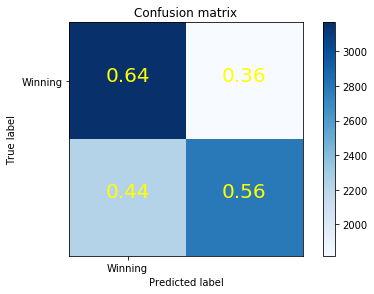

In [202]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=20,
                 horizontalalignment="center",
                 color="yellow" if cm[i, j] > thresh else "red")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
plot_confusion_matrix(metrics.confusion_matrix(y_true, y_pred), classes=["Winning"])

In [143]:
from sklearn.model_selection import GridSearchCV

#parameters we will tune
estimator_params = {"LogReg":{
                               'C':[0.001, 0.01,0.025, 0.1, 1, 2, 10, 100]}, 
              "Nearest Neighbors": {'n_neighbors': [3, 5, 7, 10]},
              "Linear SVM": {'kernel':["linear"],
                             'C':[0.001, 0.01, 0.025, 0.1, 1, 2, 10, 100], },
            "RBF SVM": {'gamma':[0.1,0.5, 1,2,4,8], 
                        'C':[0.001, 0.01, 0.025, 0.1, 1, 2, 10, 100]},
            "Decision Tree": {'max_depth':[None, 3, 5, 10, 20], 'splitter':['best', 'random']},
                    "Random Forest": {'n_estimators':[10,100,200], 'max_depth':[None, 3, 5, 10, 20]},
                    "Neural Net": {'alpha': [ 0.0001, 0.001, 0.01, .01],
                                  'hidden_layer_sizes': [(8,8,4),(8,8,8), (10,), (8,), (10,8), (10,8,4)]}
                   }

names = list(estimator_params.keys())
def grid_search():
    for i in range(len(names)): 
        print(names[i])
        model = classifiers[i]

        #executing grid search with model
        param = estimator_params[names[i]]
        grid_search= GridSearchCV(model,param,cv=3)

        #testing performance of the grid search 
        grid_search.fit(X=x_train, y=y_train)

        print('\tBest parameters:', grid_search.best_params_)
        print('\tBest cross-validation score:', grid_search.best_score_)
        print('\tTest set score:',grid_search.score(x_test,y_test))

In [131]:
def matrix_metrix(y_true, y_pred):
    CM = metrics.confusion_matrix(y_true, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    Population = TN + FN + TP + FP
    Prevalence = round((TP + FP) / Population, 3)
    Accuracy = round((TP + TN) / Population, 3)
    Precision = round(TP / (TP + FP), 3)
    NPV = round(TN / (TN + FN), 3)
    FDR = round(FP / (TP + FP), 3)
    FOR = round(FN / (TN + FN), 3)
    check_Pos = Precision + FDR
    check_Neg = NPV + FOR
    Recall = round(TP / (TP + FN), 3)
    FPR = round(FP / (TN + FP), 3)
    Specificity = 1 - FPR
    FNR = round(FN / (TP + FN), 3)
    TNR = round(TN / (TN + FP), 3)
    check_Pos2 = Recall + FNR
    check_Neg2 = FPR + TNR
    LRPos = round(Recall / FPR, 3)
    LRNeg = round(FNR / TNR, 3)
    DOR = round(LRPos / LRNeg)
    F1 = round(2 * ((Precision * Recall) / (Precision + Recall)), 4)
    F2 = round((1 + 2 ** 2) * ((Precision * Recall) / ((2 ** 2 * Precision) + Recall)), 4)
    MCC = round(((TP * TN) - (FP * FN)) / math.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)), 4)
    BM = Recall + TNR - 1
    MK = Precision + NPV - 1
#     AUC = round(metrics.roc_auc_score(y_true, prediction), 3)

    met_dict = {
        'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 'Prevalence': Prevalence,
        'Accuracy': Accuracy, 'Precision': Precision, 'Recall': Recall,
        'F1': F1, 'F2': F2,
        # 'AUC':AUC,
        'NPV': NPV, 'FPR': FPR,
        'TNR': Specificity, 'FNR': FNR, 'TNR': TNR, 'FDR': FDR, 'FOR': FOR, 'check_Pos': check_Pos,
        'check_Neg': check_Neg, 'check_Pos2': check_Pos2, 'check_Neg2': check_Neg2, 'LR+': LRPos,
        'LR-': LRNeg, 'DOR': DOR, 'MCC': MCC, 'BM': BM, 'MK': MK
    }

    return met_dict
matrix_metrix(y_true, y_pred)

{'TP': 3171,
 'TN': 2811,
 'FP': 2175,
 'FN': 1843,
 'Prevalence': 0.535,
 'Accuracy': 0.598,
 'Precision': 0.593,
 'Recall': 0.632,
 'F1': 0.6119,
 'F2': 0.6238,
 'NPV': 0.604,
 'FPR': 0.436,
 'TNR': 0.564,
 'FNR': 0.368,
 'FDR': 0.407,
 'FOR': 0.396,
 'check_Pos': 1.0,
 'check_Neg': 1.0,
 'check_Pos2': 1.0,
 'check_Neg2': 1.0,
 'LR+': 1.45,
 'LR-': 0.652,
 'DOR': 2.0,
 'MCC': 0.1967,
 'BM': 0.19599999999999995,
 'MK': 0.19700000000000006}

In [144]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    grid_search()


LogReg
	Best parameters: {'C': 10}
	Best cross-validation score: 0.6015666666666667
	Test set score: 0.5978
Nearest Neighbors


KeyboardInterrupt: 

In [80]:

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=.1, max_iter=10000)]

# names = ["LogReg", "Nearest Neighbors",
#          "Linear SVM", "RBF SVM", 
#          "Decision Tree", "Random Forest", "Neural Net"]

# kfold = KFold(n_splits=10, shuffle=True)


# for i in range(len(classifiers)):
#     start_time = time.time()
#     c = classifiers[i]
#     scores = cross_val_score(estimator=c, X=x_train, y=y_train, cv=kfold)
#     total = time.time() - start_time

#     print(names[i], scores.mean())
#     print(total, "seconds")
    
    


In [ ]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
# X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = DecisionTreeClassifier(max_depth=5)
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(x_train, y_train)
selector.support_


# selector.ranking_
